In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, add_image
from PIL import Image
import urllib

In [2]:
### Import class of SofaScore
import sys
sys.path.append('../')
from classes.sofaScore import sofaScore

In [3]:
dataSofa = sofaScore()

In [4]:
## Grab match
url_match = 'https://www.sofascore.com/nottingham-forest-burnley/gso#11352618'
data_match = dataSofa.get_match(url_match)

11352618
Logos Saved Succesfully
Logos Saved Succesfully


In [5]:
### TESTING
data_match['Logos'][0]

'../logos/nottingham-forest.png'

## Team Names 

In [6]:
team_names = [data_match['Event']['homeTeam'][0]['name'][0], data_match['Event']['awayTeam'][0]['name'][0]]
team_scores = [data_match['Event']['homeScore'][0]['current'][0], data_match['Event']['awayScore'][0]['current'][0]]

## Plotted Shots

In [7]:
shots = data_match['Shotmap']

In [8]:
#### Home team
home_terciary_shots = shots[shots['isHome'] == True][shots['shotType'] != 'goal']
home_secondary_shots = home_terciary_shots[home_terciary_shots['shotType'] != 'miss']
home_primary_shots = shots[shots['isHome'] == True][shots['shotType'] == 'goal']

#### Away team
away_terciary_shots = shots[shots['isHome'] != True][shots['shotType'] != 'goal']
away_secondary_shots = away_terciary_shots[away_terciary_shots['shotType'] != 'miss']
away_primary_shots = shots[shots['isHome'] != True][shots['shotType'] == 'goal']

## Plot function: 

In [9]:
## Setup Missed shots:

def plot_shots(pitch, axs, primary, terciary, secondary=None, color='#b94b75', names=True): 
    shot_plot_miss_goal = pitch.scatter(terciary['y_start'], terciary['x_start'], marker='o', s=200, ax=axs, label='Shooter', zorder=1.2, c='None', hatch='///', edgecolors=color, alpha=0.2)
    line_miss_goal = pitch.lines(terciary['y_start'], terciary['x_start'],  terciary['y_end'], terciary['x_end'], comet=True, label='shot', color=color, ax=axs, transparent=True, alpha=0.1)

    if(secondary is not None and not secondary.empty):
        ## Setup Close shots:
        shot_plot_non_goal = pitch.scatter(secondary['y_start'], secondary['x_start'], marker='o', s=300, ax=axs, label='Shooter', zorder=1.2, c='None', hatch='///', edgecolors=color, alpha=0.5)
        line_non_goal = pitch.lines(secondary['y_start'], secondary['x_start'],  secondary['y_end'], secondary['x_end'], comet=True, label='shot', color=color, ax=axs, transparent=True, alpha=0.3)

    ### Setup goal:
    shot_plot_goal = pitch.scatter(primary['y_start'], primary['x_start'], marker='football', s=500, ax=axs, label='Shooter', zorder=1.2, c='white', edgecolors=color)
    line_plot_goal = pitch.lines(primary['y_start'], primary['x_start'],  primary['y_end'], primary['x_end'], comet=True, label='shot', color=color, ax=axs)

    if(names):
        #### NOTES:
        # Goals:
        copy_shots = primary.reset_index(drop=True)
        for i in range(len(copy_shots)):
            pitch.annotate(copy_shots['shortName'][i], (copy_shots['y_start'][i]-3, copy_shots['x_start'][i]), va='center', ha='center', color='#fff', fontsize=12, ax=axs, alpha=0.9)

## Function to plot coords:

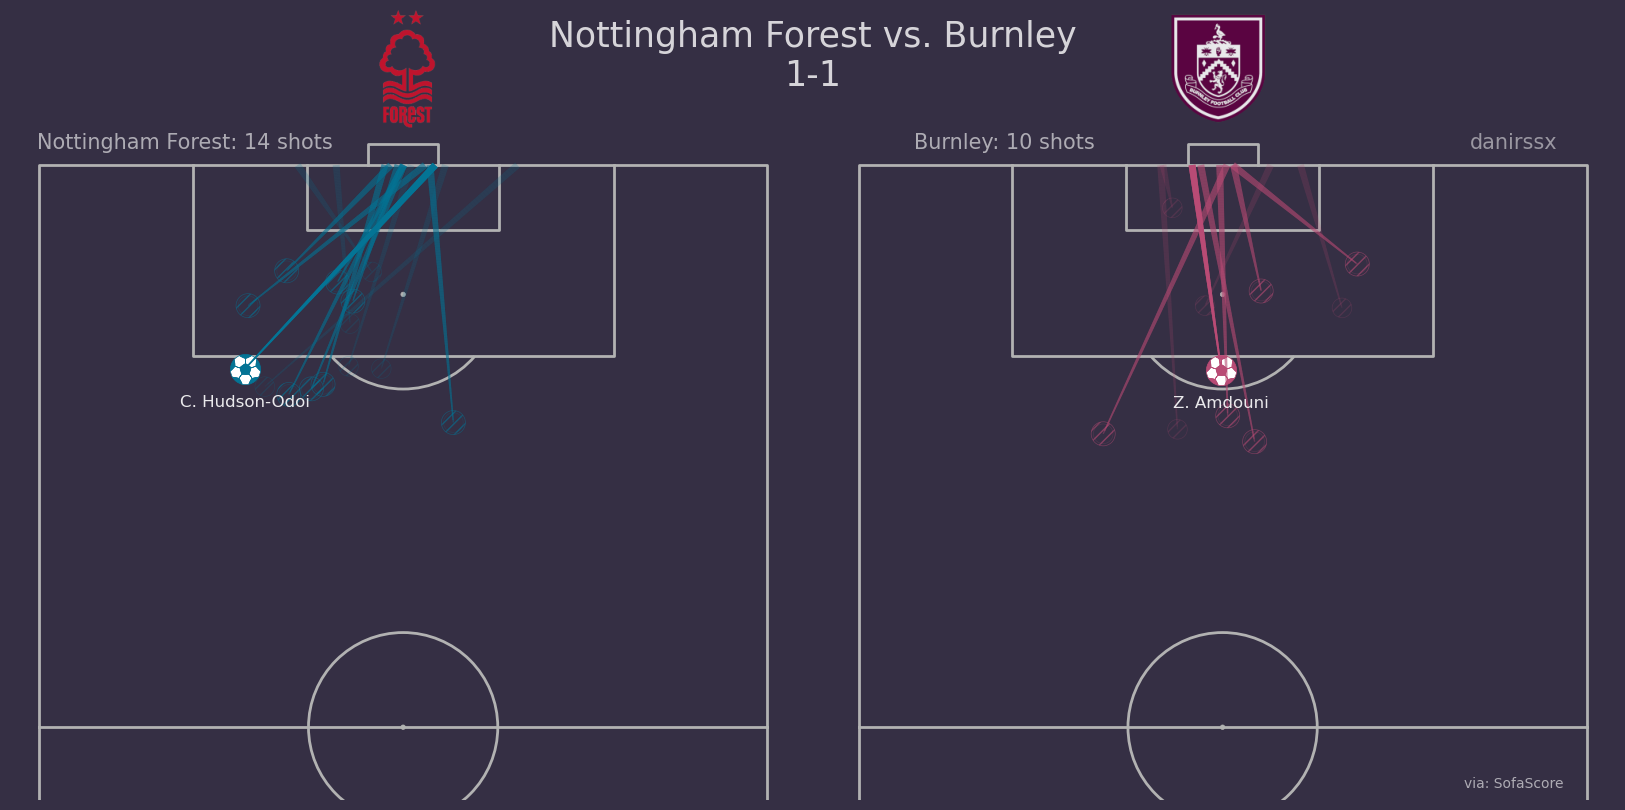

In [10]:
## Styles
plt.style.use('bmh')

## Setup the pitch
pitch = VerticalPitch(pitch_color='#352F44', half=True, pad_bottom=10, goal_type='box', pitch_type='opta')
fig, axs = pitch.grid(ncols=2, figheight=8, endnote_height=0, title_height=0.1, title_space=0.05, axis=False, grid_height=0.83)

# PLOT
plot_shots(pitch, axs['pitch'][0], home_primary_shots, home_terciary_shots, home_secondary_shots, color='#047495', names=True)
plot_shots(pitch, axs['pitch'][1], away_primary_shots, away_terciary_shots, away_secondary_shots, names=True)

# Credits
pitch.annotate('danirssx', (102, 10),
                   va='center', ha='center', color='#fff', alpha=0.5,
                    fontsize=15, ax=axs['pitch'][1])
pitch.annotate('via: SofaScore', (45, 10),
                   va='center', ha='center', color='#fff', alpha=0.6,
                    fontsize=10, ax=axs['pitch'][1])

## Plot team stats:
length_shots = [len(shots[shots['isHome'] == True]), len(shots[shots['isHome'] != True])]
pitch.annotate(f'{team_names[0]}: {length_shots[0]} shots', (102, 80),
                   va='center', ha='center', color='#fff', alpha=0.6,
                    fontsize=15, ax=axs['pitch'][0])

pitch.annotate(f'{team_names[1]}: {length_shots[1]} shots', (102, 80),
                   va='center', ha='center', color='#fff', alpha=0.6,
                    fontsize=15, ax=axs['pitch'][1])

## Plot title:
axs['title'].text(0.5, 0.5, f'{team_names[0]} vs. {team_names[1]}\n{team_scores[0]}-{team_scores[1]}',
                  va='center', ha='center', color='#fff', alpha=0.8, fontsize=25)

fig.set_facecolor('#352F44')

## Plotting the Logos:
# HOME
club_home_icon = Image.open(data_match['Logos'][0])
ax_image_home = add_image(club_home_icon, fig, left=0.225, bottom=0.85, width=0.07,
                     alpha=0.9, interpolation='hanning')

# AWAY
club_away_icon = Image.open(data_match['Logos'][1])
ax_image_home = add_image(club_away_icon, fig, left=0.705, bottom=0.85, width=0.07,
                     alpha=0.9, interpolation='hanning')